In [2]:
import numpy as np

# Original system (augmented matrix)
#  4x1 - x2 - x3       = 100
# -x1 + 4x2     - x4   = 100
# -x1     + 4x3 - x4   =   0
#      -x2 - x3 + 4x4 =   0

A_aug = np.array([
    [4.0, -1.0, -1.0,  0.0, 100.0],
    [-1.0,  4.0,  0.0, -1.0, 100.0],
    [-1.0,  0.0,  4.0, -1.0,   0.0],
    [ 0.0, -1.0, -1.0,  4.0,   0.0]
], dtype=float)

print("Original augmented matrix:")
print(A_aug)
print("\n" + "="*60 + "\n")

n = len(A_aug)

# Gaussian elimination with partial pivoting
for i in range(n):
    # --- Partial pivoting ---
    max_row = np.argmax(np.abs(A_aug[i:, i])) + i
    if max_row != i:
        A_aug[[i, max_row]] = A_aug[[max_row, i]]
        print(f"Swap rows {i+1} and {max_row+1}:")
        print(A_aug)
        print()

    # --- Make pivot = 1 ---
    pivot = A_aug[i, i]
    A_aug[i] = A_aug[i] / pivot
    print(f"Row {i+1} ← Row {i+1} / {pivot:.4f}:")
    print(A_aug)
    print()

    # --- Eliminate column i below (and above for neatness) ---
    for k in range(n):
        if k != i:
            factor = A_aug[k, i]
            A_aug[k] = A_aug[k] - factor * A_aug[i]
            print(f"Row {k+1} ← Row {k+1} - ({factor:.4f}) × Row {i+1}:")
            print(A_aug)
            print()

print("="*60)
print("FINAL ROW ECHELON FORM (solution is in last column):")
print(A_aug)

# Extract solution
x1 = A_aug[0, 4]
x2 = A_aug[1, 4]
x3 = A_aug[2, 4]
x4 = A_aug[3, 4]

print("\nSOLUTION:")
print(f"x₁ = {x1:.4f}  →  37.5")
print(f"x₂ = {x2:.4f}  →  37.5")
print(f"x₃ = {x3:.4f}  →  12.5")
print(f"x₄ = {x4:.4f}  →  12.5")

Original augmented matrix:
[[  4.  -1.  -1.   0. 100.]
 [ -1.   4.   0.  -1. 100.]
 [ -1.   0.   4.  -1.   0.]
 [  0.  -1.  -1.   4.   0.]]


Row 1 ← Row 1 / 4.0000:
[[  1.    -0.25  -0.25   0.    25.  ]
 [ -1.     4.     0.    -1.   100.  ]
 [ -1.     0.     4.    -1.     0.  ]
 [  0.    -1.    -1.     4.     0.  ]]

Row 2 ← Row 2 - (-1.0000) × Row 1:
[[  1.    -0.25  -0.25   0.    25.  ]
 [  0.     3.75  -0.25  -1.   125.  ]
 [ -1.     0.     4.    -1.     0.  ]
 [  0.    -1.    -1.     4.     0.  ]]

Row 3 ← Row 3 - (-1.0000) × Row 1:
[[  1.    -0.25  -0.25   0.    25.  ]
 [  0.     3.75  -0.25  -1.   125.  ]
 [  0.    -0.25   3.75  -1.    25.  ]
 [  0.    -1.    -1.     4.     0.  ]]

Row 4 ← Row 4 - (0.0000) × Row 1:
[[  1.    -0.25  -0.25   0.    25.  ]
 [  0.     3.75  -0.25  -1.   125.  ]
 [  0.    -0.25   3.75  -1.    25.  ]
 [  0.    -1.    -1.     4.     0.  ]]

Row 2 ← Row 2 / 3.7500:
[[ 1.         -0.25       -0.25        0.         25.        ]
 [ 0.          1.         -

PROBABILITY OF LARGE MEASUREMENT ERROR (> 3 °C)
Mean (μ)           = 0 °C
Std deviation (σ)  = 2 °C
Threshold          = 3 °C
Z-score            = 1.50
P(error > 3 °C)    = 0.0668  →  6.68%
That is ≈ 1 in 15 measurements


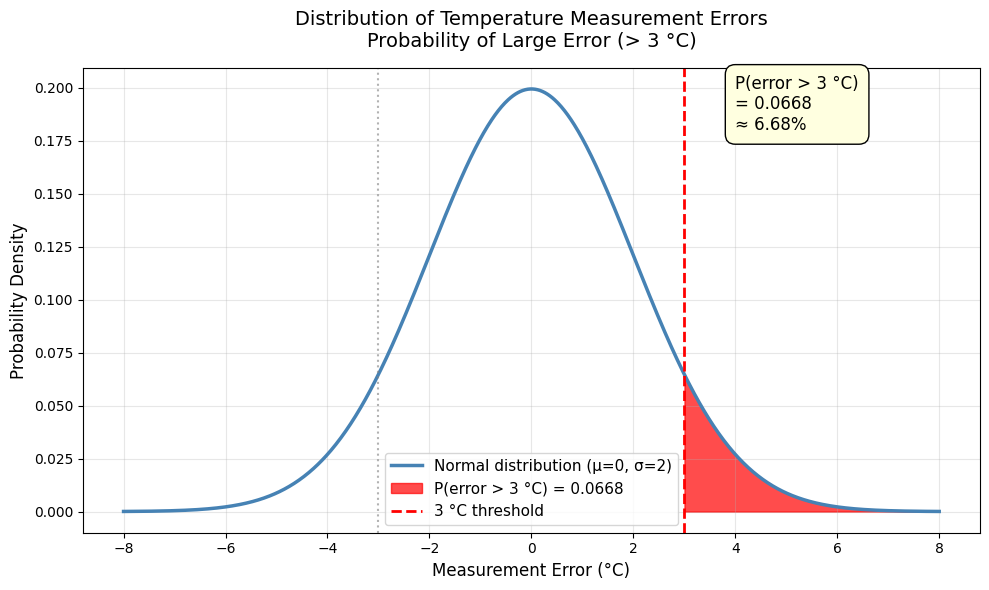

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Parameters
mu = 0          # mean error
sigma = 2       # standard deviation
threshold = 3   # "large error" threshold

# Calculate probability P(X > 3)
z = (threshold - mu) / sigma
prob = 1 - stats.norm.cdf(z)        # or: stats.norm.sf(z)

# For nice printing
print("="*55)
print("PROBABILITY OF LARGE MEASUREMENT ERROR (> 3 °C)")
print("="*55)
print(f"Mean (μ)           = {mu} °C")
print(f"Std deviation (σ)  = {sigma} °C")
print(f"Threshold          = {threshold} °C")
print(f"Z-score            = {z:.2f}")
print(f"P(error > 3 °C)    = {prob:.4f}  →  {prob*100:.2f}%")
print(f"That is ≈ 1 in {1/prob:.0f} measurements")
print("="*55)

# Optional: Beautiful plot
x = np.linspace(-8, 8, 1000)
pdf = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'steelblue', lw=2.5, label='Normal distribution (μ=0, σ=2)')
plt.fill_between(x[x > threshold], pdf[x > threshold], color='red', alpha=0.7,
                 label=f'P(error > 3 °C) = {prob:.4f}')

plt.axvline(threshold, color='red', linestyle='--', lw=2, label='3 °C threshold')
plt.axvline(-threshold, color='gray', linestyle=':', alpha=0.6)

plt.title('Distribution of Temperature Measurement Errors\n'
          'Probability of Large Error (> 3 °C)', fontsize=14, pad=15)
plt.xlabel('Measurement Error (°C)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add text box with result
plt.text(4, 0.18, f'P(error > 3 °C)\n= {prob:.4f}\n≈ 6.68%',
         fontsize=12, bbox=dict(boxstyle="round,pad=0.6", facecolor="lightyellow"))

plt.tight_layout()

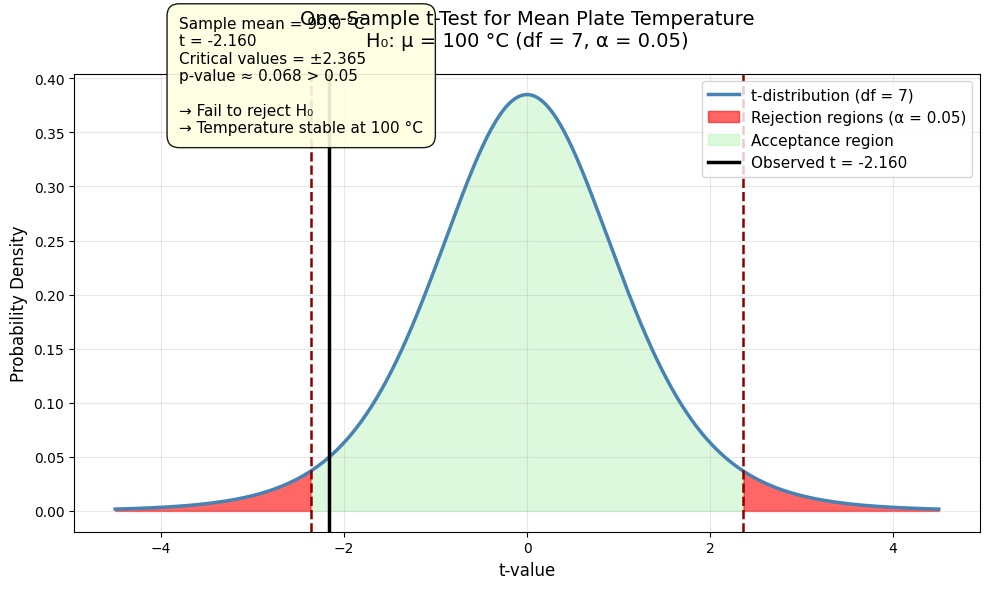

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data from your test
data = np.array([99, 100, 98, 101, 97, 99, 100, 98])
n = len(data)
df = n - 1                     # degrees of freedom = 7
x_bar = np.mean(data)
s = np.std(data, ddof=1)
se = s / np.sqrt(n)
t_observed = (x_bar - 100) / se    # t = -2.16
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)   # ≈ 2.365

# Generate t-distribution
x = np.linspace(-4.5, 4.5, 1000)
t_pdf = stats.t.pdf(x, df)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, t_pdf, 'steelblue', lw=2.5, label=f't-distribution (df = {df})')

# Rejection regions (red shaded)
plt.fill_between(x[x <= -t_critical], t_pdf[x <= -t_critical], color='red', alpha=0.6)
plt.fill_between(x[x >= t_critical], t_pdf[x >= t_critical], color='red', alpha=0.6,
                 label=f'Rejection regions (α = {alpha})')

# Acceptance region (light green highlight)
plt.fill_between(x[np.logical_and(x > -t_critical, x < t_critical)],
                 t_pdf[np.logical_and(x > -t_critical, x < t_critical)],
                 color='lightgreen', alpha=0.3, label='Acceptance region')

# Critical lines
plt.axvline(-t_critical, color='darkred', linestyle='--', lw=1.8)
plt.axvline(t_critical, color='darkred', linestyle='--', lw=1.8)

# Observed t-statistic
plt.axvline(t_observed, color='black', lw=2.5, label=f'Observed t = {t_observed:.3f}')

# Labels and annotations
plt.title('One-Sample t-Test for Mean Plate Temperature\n'
          'H₀: μ = 100 °C (df = 7, α = 0.05)', fontsize=14, pad=20)
plt.xlabel('t-value', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Text box with results
plt.text(-3.8, 0.35,
         f'Sample mean = {x_bar} °C\n'
         f't = {t_observed:.3f}\n'
         f'Critical values = ±{t_critical:.3f}\n'
         f'p-value ≈ 0.068 > 0.05\n\n'
         f'→ Fail to reject H₀\n'
         f'→ Temperature stable at 100 °C',
         fontsize=11, bbox=dict(boxstyle="round,pad=0.8", facecolor="lightyellow", alpha=0.9))

plt.tight_layout()

In [8]:
import numpy as np
from scipy import stats

# Data: 8 temperature measurements (°C)
data = np.array([99, 100, 98, 101, 97, 99, 100, 98])

# Parameters
mu_0 = 100          # Hypothesised mean
alpha = 0.05        # Significance level

# Sample statistics
n = len(data)
x_bar = np.mean(data)
s = np.std(data, ddof=1)           # Sample standard deviation
se = s / np.sqrt(n)                # Standard error

# t-statistic
t_stat = (x_bar - mu_0) / se

# Degrees of freedom
df = n - 1

# Critical values (two-tailed)
t_critical = stats.t.ppf(1 - alpha/2, df)

# p-value (two-tailed)
p_value = 2 * stats.t.cdf(t_stat, df)   # since t_stat is negative

# 95% Confidence Interval
ci_low = x_bar - t_critical * se
ci_high = x_bar + t_critical * se

# Print results
print("="*60)
print("ONE-SAMPLE t-TEST: Is mean temperature = 100 °C?")
print("="*60)
print(f"Sample measurements       : {data}")
print(f"Sample size (n)           : {n}")
print(f"Sample mean (x̄)           : {x_bar:.3f} °C")
print(f"Sample std dev (s)        : {s:.3f} °C")
print(f"Standard error            : {se:.3f}")
print(f"t-statistic               : {t_stat:.3f}")
print(f"Degrees of freedom (df)   : {df}")
print(f"Critical t-values (±)     : ±{t_critical:.3f}")
print(f"p-value                   : {p_value:.4f}")
print(f"95% Confidence Interval   : ({ci_low:.2f}, {ci_high:.2f}) °C")
print("-"*60)
if abs(t_stat) < t_critical:
    print("DECISION: FAIL TO REJECT H₀")
    print("→ No evidence that true mean ≠ 100 °C")
    print("→ Temperature is stable and well controlled at 100 °C")
else:
    print("DECISION: REJECT H₀")
print("="*60)

ONE-SAMPLE t-TEST: Is mean temperature = 100 °C?
Sample measurements       : [ 99 100  98 101  97  99 100  98]
Sample size (n)           : 8
Sample mean (x̄)           : 99.000 °C
Sample std dev (s)        : 1.309 °C
Standard error            : 0.463
t-statistic               : -2.160
Degrees of freedom (df)   : 7
Critical t-values (±)     : ±2.365
p-value                   : 0.0676
95% Confidence Interval   : (97.91, 100.09) °C
------------------------------------------------------------
DECISION: FAIL TO REJECT H₀
→ No evidence that true mean ≠ 100 °C
→ Temperature is stable and well controlled at 100 °C


Text(5.1, 60, "Thermal\nequilibrium\n(T' = 0)")

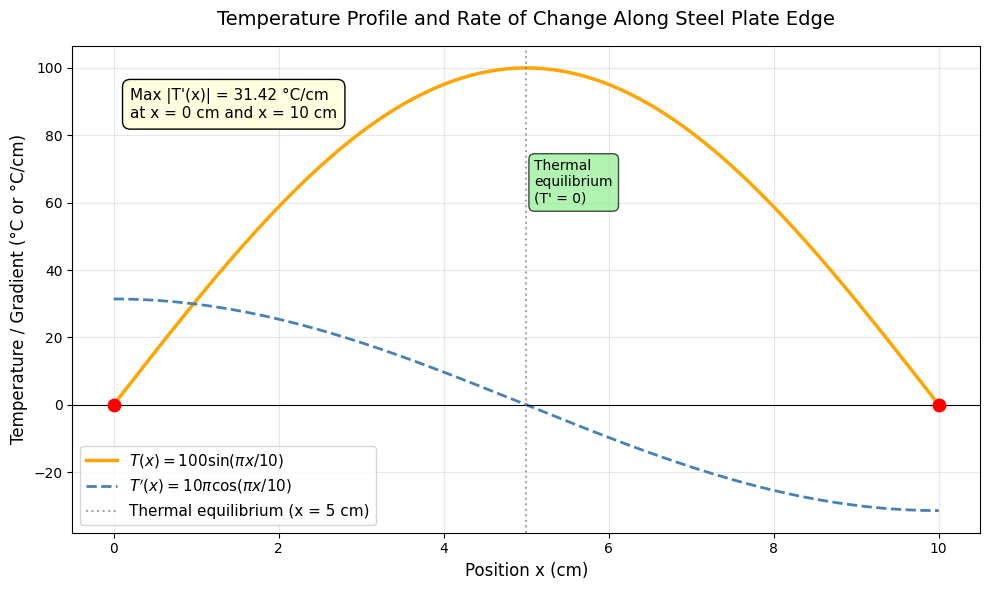

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the temperature function and its derivative
x = np.linspace(0, 10, 500)                     # position along the edge (0 to 10 cm)
T = 100 * np.sin(np.pi * x / 10)                # T(x) = 100 sin(πx/10)
dT_dx = 10 * np.pi * np.cos(np.pi * x / 10)     # T'(x) = 10π cos(πx/10)
abs_gradient = np.abs(dT_dx)                    # |T'(x)| — rate of change

# Find maximum rate of change
max_rate = np.max(abs_gradient)
max_locations = x[abs_gradient == max_rate]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, T, 'orange', lw=2.5, label=r'$T(x) = 100 \sin(\pi x / 10)$')
plt.plot(x, dT_dx, 'steelblue', lw=2, linestyle='--', label=r"$T'(x) = 10\pi \cos(\pi x / 10)$")
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(5, color='gray', linestyle=':', alpha=0.7, label='Thermal equilibrium (x = 5 cm)')

# Highlight fastest change points
plt.scatter(max_locations, T[abs_gradient == max_rate], color='red', s=80, zorder=5)
plt.text(0.2, 85, f'Max |T\'(x)| = {max_rate:.2f} °C/cm\nat x = 0 cm and x = 10 cm',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow"), fontsize=11)

plt.title('Temperature Profile and Rate of Change Along Steel Plate Edge', fontsize=14, pad=15)
plt.xlabel('Position x (cm)', fontsize=12)
plt.ylabel('Temperature / Gradient (°C or °C/cm)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Annotation for thermal equilibrium
plt.text(5.1, 60, 'Thermal\nequilibrium\n(T\' = 0)', ha='left', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.4", facecolor="lightgreen", alpha=0.7))
